In [33]:
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import gc
from sklearn import preprocessing
import matplotlib as mpl
from functools import wraps
import os
from sklearn.preprocessing import LabelEncoder
# from sklearn.externals import joblib
from joblib import Parallel, delayed
import multiprocessing
from datetime import timedelta
from io import StringIO
# from sklearn.externals import joblib
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from random import random
import os

df1=pd.read_csv('online/0.730044__6.csv',index_col=0)
df2=pd.read_csv('LOAN_JS_FH_SX_04_20191209_03.csv',index_col=0)
df1.index.name='cust_no'
df2.index.name='cust_no'
df=pd.merge(df1,df2,on='cust_no')
df.corr()

,target_x,target_y
target_x,1.000000,0.936657
target_y,0.936657,1.000000


In [141]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

dataset_test=pd.read_hdf('dataset/1_1_3_1_eval.h5', key='EVAL')
dfs=[]

for dirpath,dirname,filenames in os.walk('eval_lgb/'):
    if len(filenames)==0:
        continue
    if dirpath!='eval_lgb/':
        continue
    for filename in filenames:
        if len(re.findall('^0.+?\.csv$',filename))==1:
            filepath=dirpath+filename
            f=filename[0:7]
            f=float(f)
            if f<0.7:
                continue
            #print(filepath)
            df=pd.read_csv(filepath,index_col=0)
            y_pr=pd.DataFrame(MinMaxScaler().fit_transform(df.values.reshape(-1, 1)))
            y_pr.index=df.index
            dfs.append(y_pr)
df=pd.concat(dfs,axis=1)
y_pr=df.mean(axis=1)
print(len(dfs))
roc_auc_score(dataset_test['target'],y_pr)

# df_.to_csv('LOAN_JS_FH_SX_04_20191207_02.csv',header=['target'])


1


0.7887969692953029

In [140]:
# plt.hist(y_pr,bins=50,stacked=True,histtype='step')
plt.plot(y_pr)
plt.show()

KeyboardInterrupt: 

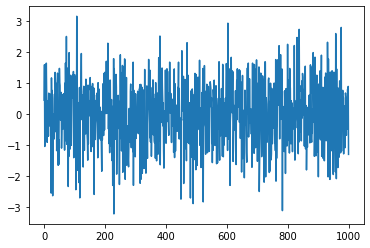

In [137]:
ar=np.random.normal(loc=0,scale=1,size=(1000,))
plt.plot(ar)
plt.show()

In [111]:
np.random.normal(0,1,100)

array([-1.05490439e+00, -1.07283654e+00, -1.37829057e-01,  1.31107148e+00,
        1.75953051e-01, -2.63595012e-01,  5.95505077e-02, -5.52402043e-02,
       -1.14518777e+00, -1.06766371e-01,  7.41336886e-01, -5.15792046e-01,
       -6.32781616e-01,  1.92417722e-01,  1.01584261e+00, -1.43437219e-01,
        2.17867301e+00, -1.74292284e-01, -2.77191239e-01,  1.28645761e+00,
        1.64764131e-01,  1.64535458e+00, -1.04300561e+00,  7.54467645e-02,
        1.29117723e+00, -1.20982042e+00,  5.09511041e-01, -7.22364697e-01,
        5.06349654e-01, -3.73374307e-01, -5.56602039e-02,  8.83447338e-01,
        2.03649539e+00,  1.32038517e+00, -5.35180922e-01, -1.96490271e-02,
       -6.51098701e-01, -1.31347649e+00,  2.43133071e+00, -1.17071459e+00,
        1.78659400e+00, -6.58991968e-01,  1.33958993e+00,  1.58023958e+00,
        4.86379860e-01, -8.04088417e-01,  1.89875234e-01,  9.73535817e-02,
       -4.36314295e-01,  2.25797546e-01, -2.87017022e-01, -1.09548162e+00,
       -1.72362368e+00, -